In [64]:
import os
import pandas as pd
import torch
from torch.utils import data
from torch.utils.data import Dataset
from skimage import io
from skimage.io import imread
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from skimage import io, transform
import torchvision.transforms.functional as TF
import random

In [65]:
class CiliaDataSet(Dataset):
    def __init__(self, train_txt, root_dir):
        self.annotations = pd.read_csv(train_txt)
        self.root_dir = root_dir
        self.inputs_dtype = torch.float32
        self.masks_dtype = torch.long
    def __len__(self):
        return len(self.annotations)
    
    def transform(self, image, mask):
        # Resize
        resize = transforms.Resize(size=(520, 520))
        image = resize(image)
        mask = resize(mask)

        # Random crop
        i, j, h, w = transforms.RandomCrop.get_params(
            image, output_size=(512, 512))
        image = TF.crop(image, i, j, h, w)
        mask = TF.crop(mask, i, j, h, w)

        # Random horizontal flipping
        if random.random() > 0.5:
            image = TF.hflip(image)
            mask = TF.hflip(mask)

        # Random vertical flipping
        if random.random() > 0.5:
            image = TF.vflip(image)
            mask = TF.vflip(mask)

        # Transform to tensor
        image = TF.to_tensor(image)
        mask = TF.to_tensor(mask)
        return image, mask

    
    def __getitem__(self,index: int):
        
        img_path = os.path.join(self.root_dir, "data",self.annotations.iloc[index,0], "data",self.annotations.iloc[index,0],"frame0000.png")
        mask_path = os.path.join(self.root_dir, "masks",self.annotations.iloc[index,0]+".png")
        image = Image.open(img_path)
        label = Image.open(mask_path)
        image, label = self.transform(image, label)
        #image, label = torch.from_numpy(image).type(self.inputs_dtype), torch.from_numpy(label).type(self.masks_dtype)
        return image,label
    


In [66]:

data_transform = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
cilia_dataset = CiliaDataSet(train_txt= 'D:/MS/DataSciencePracticum/P3/train.txt', root_dir = 'D:/MS/DataSciencePracticum/P3' ) 
                                                          
                               
                              
                            

In [43]:
#temp_img, temp_mask = ciliaDataObject[5]
#plt.imshow(temp_img.numpy().transpose((1, 2, 0)))
#plt.axis('off')
#plt.show()

In [67]:
dataset_loader = data.DataLoader(dataset = cilia_dataset, batch_size=2, shuffle=True)
x, y = next(iter(dataset_loader))

print(f'x = shape: {x.shape}; type: {x.dtype}')
print(f'x = min: {x.min()}; max: {x.max()}')
print(f'y = shape: {y.shape}; class: {y.unique()}; type: {y.dtype}')





x = shape: torch.Size([2, 1, 512, 512]); type: torch.float32
x = min: 0.22745098173618317; max: 0.9882352948188782
y = shape: torch.Size([2, 1, 512, 512]); class: tensor([0.0000, 0.0039, 0.0078]); type: torch.float32


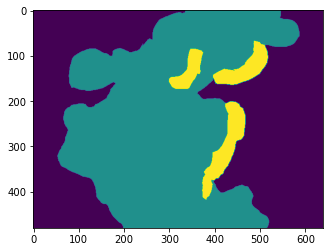

In [23]:
plt.imshow(temp_mask)

In [14]:
data_loader = data.DataLoader(dataset=ciliaDataObject, batch_size=2,shuffle=True)

x, y = next(iter(data_loader))

print(f'x =shape: {x.shape};')


TypeError: __call__() takes 2 positional arguments but 3 were given